<header style="padding: 4em 0 0em 0">
    <img src="http://brentyi.github.io/hosted/ai4all_logo.svg" style="width: 30em; height: auto;" />
    <h3 style="margin: 1em 0 0 0;">
        <strong>Computer Vision I</strong>
        <span style="color: #777">
        &nbsp;&blacksquare;&nbsp;
        Robotics, Summer 2020</span>
    </h3>
</header>

<hr style="border: 0.2em solid #eee;" />

Today, we'll kick off our Computer Vision unit by learning to work with images!

Our core goals will be to:
1. Get familiar with **NumPy**, a powerful library for working with numbers in Python
2. Explore and visualize image representations: **Grayscale**, **RGB**, and **HSL**
3. Use NumPy to implement some image processing algorithms: **cropping**, **resizing**, and **blurring**

<hr style="border: 0.2em solid #eee;" />

## 1. Getting Started With NumPy

Before we start using NumPy, we need to import it! Run the cell below to do just that:

In [1]:
import numpy as np

### a) Code Study

The primary feature of NumPy is the **NumPy array** &mdash; a versatile way to work with collections of numbers in Python.

In many ways, these are very similar to the native Python `list` collection, which we looked at last week. A big chunk of the syntax is actually identical!

To highlight some of these similarities, try walking through these examples:


In [10]:
# Create two sets of numbers: one as a native list, and the other as a NumPy array
list_numbers = [1, 2, 3, 4]
array_numbers = np.array([1, 2, 3, 4])

# Print each set of numbers: they should look the same!
print("list_numbers =", list_numbers)
print("array_numbers =", array_numbers)
print()

# Index into each collection of numbers
print("list_numbers[0] =", list_numbers[0])
print("array_numbers[0] =", array_numbers[0])
print()

# Grab a "slice" of each collection of numbers
print("list_numbers[1:3] =", list_numbers[1:3])
print("array_numbers[1:3] =", array_numbers[1:3])
print()

# Get the lengths of each collection
print("len(list_numbers) =", len(list_numbers))
print("len(array_numbers) =", len(array_numbers))
print()

# Iterate over each collection
print("Iterating over list:")
for number in list_numbers:
    print(">", number)

print("Iterating over array:")
for number in array_numbers:
    print(">", number)

list_numbers = [1, 2, 3, 4]
array_numbers = [1 2 3 4]

list_numbers[0] = 1
array_numbers[0] = 1

list_numbers[1:3] = [2, 3]
array_numbers[1:3] = [2 3]

len(list_numbers) = 4
len(array_numbers) = 4

Iterating over list:
> 1
> 2
> 3
> 4
Iterating over array:
> 1
> 2
> 3
> 4


Okay &mdash; so if lists and arrays are so similar, why would we ever want to use arrays?

Let's answer this question with a few code studies! Feel free to modify each code block as needed: change numbers, add print statements, anything you want.

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Code Study #1: Element-wise Square</div>

In [11]:
a = np.array([1, 2, 3, 4])
b = a ** 2

What are the values of `a` and `b` after this block of code has been run?

How would you implement this if `a` is instead defined as a native Python list?

> *Your response here!*

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Code Study #2: Element-wise Summation</div>

In [12]:
a = np.array([1, 2, 3, 4])
b = np.array([0, 1, 0, 2])
c = a + b
d = c + 2


What are the values of `a`, `b`, `c`, `d` after this block of code has been run?

How would you implement this with native Python lists?

> *Your response here!*


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Code Study #3: Multi-dimensional Arrays</div>

In [13]:
a = np.zeros(shape=(5, 5))
a[0:2, 0:2] = 1
a[4, 4] = 2

b = np.ones(shape=(2, 2, 3))

c = np.sum(a)

d = b[:, :, 0]

What are the values of `a`, `b`, `c`, `d` after this block of code has been run?

How many numbers do each hold?

How would you implement this with native Python lists?

> *Your response here!*

### b) NumPy Exercise: Fast Euclidean Distance

To wrap up our overview of NumPy, let's implement something fun &mdash; a helper function for computing the Euclidean distance between two points!

In the 2-dimensional case, computing the Euclidean distance reduces to solving the Pythagorean theorem $c = \sqrt{a^2 + b^2}$:

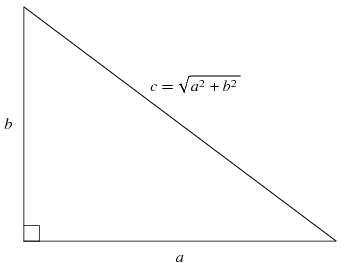

...where, given two points $(x_1, y_1)$ and $(x_2, y_2)$, $a = x_1 - x_2$ and $b = y_1 - y_2$.


More generally, given two $n$-dimensional vectors, the Euclidean distance can be computed by:

1. Performing an elementwise subtraction between the two vectors, to get $n$ difference values
2. Squaring each of the $n$ difference values, and summing the squares
4. Taking the square root of our sum

Alternatively, the Euclidean distance between length-$n$ vectors $u$ and $v$ can be written as:

$
\quad\textbf{distance}(u, v) = \sqrt{\sum_{i=1}^n (u_i - v_i)^2}
$


Using standard Python lists, we've provided a baseline implementation of thie calculation, called `euclidean_distance_native()`.

Your job: try implementing this using NumPy!

In [14]:
def euclidean_distance_native(u, v):
    # First, run some checks:
    assert isinstance(u, list)
    assert isinstance(v, list)
    assert len(u) == len(v)

    # Compute the distance!
    squared_distance = 0.0
    for i in range(len(u)):
        # Note that '**' is the exponent operator
        difference = u[i] - v[i]
        squared_distance += difference ** 2
    return squared_distance ** 0.5

In [15]:
def euclidean_distance_numpy(u, v):
    # First, run some checks:
    assert isinstance(u, np.ndarray)
    assert isinstance(v, np.ndarray)
    assert u.shape == v.shape

    # Compute the distance!
    # Note:
    #  1) You shouldn't need any loops
    #  2) Some functions that might be useful: np.sqrt(), np.sum()

    # ~~START DELETE~~
    return np.sqrt(np.sum((u - v) ** 2))
    # ~~END DELETE~~

Once you've implemented this algorithm, let's check that it works!

First, verify that your distance implementation gets the same results as ours:

In [16]:
# Check 2D case
a = [0.0, 0.0]
b = [3.0, 4.0]
a_array = np.array(a)
b_array = np.array(b)

print("Correct:", euclidean_distance_native(a, b))
print("Yours:", euclidean_distance_numpy(a_array, b_array))
print()

# Check 3D case
a = [1.0, 2.0, 3.0]
b = [4.0, 7.0, 1.0]
a_array = np.array(a)
b_array = np.array(b)

print("Correct:", euclidean_distance_native(a, b))
print("Yours:", euclidean_distance_numpy(a_array, b_array))
print()

Correct: 5.0
Yours: 5.0

Correct: 6.164414002968976
Yours: 6.164414002968976



Next, let's take a look at how these two implementations compare in terms of runtime:

In [26]:
n = 1000

# Create some n-dimensional arrays
a = [0.0] * n
b = [10.0] * n
a_array = np.array(a)
b_array = np.array(b)

# Compute runtime for native implementation
import time
start_time = time.time()
for i in range(1000):
    euclidean_distance_native(a, b)
print(
    "euclidean_distance_native runtime (milliseconds): ",
    (time.time() - start_time) * 1000.0,
)

# Compute runtime for numpy implementation
# Start by grabbing the current time in seconds
start_time = time.time()
for i in range(1000):
    euclidean_distance_numpy(a_array, b_array)
print(
    "euclidean_distance_numpy runtime (milliseconds): ",
    (time.time() - start_time) * 1000.0,
)

euclidean_distance_native runtime (milliseconds):  164.95037078857422
euclidean_distance_numpy runtime (milliseconds):  10.421037673950195


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Fast Euclidean Distance</div>

Compare and contrast your Euclidean distance implementation to the provided one.

What does `time.time()` return?

How do your function compare to the provided one in terms of runtime? Try out different values for `n` -- when is it faster or slower? Where might the runtime difference appearmpkk?

> *Your response here!*


## 2. Image Representations

Now that we have a basic sense of how NumPy works, we can start representing images with it!

To help with visualization, we'll be using the `matplotlib` library:

In [27]:
import matplotlib.pyplot as plt

### a) Grayscale

We can represent our grayscale images as 2D grids of numbers, where the number in each grid cell corresponds to an "intensity".

An intensity of `1.0` corresponds to white, `0.0` corresponds to black, and all numbers in between to shades of gray.


Here's an example &mdash;

In [28]:
mystery_image = np.zeros(shape=(10, 10))

for row in range(10):
    mystery_image[row, :] = (row / 20.0) + 0.1

mystery_image[3, 3] = 1.0
mystery_image[3, 6] = 1.0

mystery_image[6, 3:7] = 1.0
mystery_image[5, 2] = 1.0
mystery_image[5, 7] = 1.0

print(mystery_image)

[[0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1 ]
 [0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15]
 [0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2 ]
 [0.25 0.25 0.25 1.   0.25 0.25 1.   0.25 0.25 0.25]
 [0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3 ]
 [0.35 0.35 1.   0.35 0.35 0.35 0.35 1.   0.35 0.35]
 [0.4  0.4  0.4  1.   1.   1.   1.   0.4  0.4  0.4 ]
 [0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45 0.45]
 [0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5 ]
 [0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55 0.55]]


<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: Single-channel Visualization</div>

Oof, the raw matrix is pretty hard to interpret!

Rather than looking at our images as a grid of numbers, let's visualize them with `matplotlib` instead.

We've provided a helper function, `visualize_single_channel`, for displaying 2D arrays as grayscale images. Use it to visualize `mystery_image` from above -- what do you see?

> Your response here!


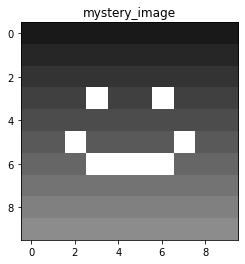

In [29]:
def visualize_single_channel(title, image):
    assert type(title) == str, "Title not a string!"
    assert len(image.shape) == 2, "Image array not 2D!"

    # Visualize image
    # We manually set the black value with `vmin`, and the white value with `vmax`
    plt.imshow(image, vmin=0.0, vmax=1.0, cmap="gray")

    # Give our plot a title -- this is purely cosmetic!
    plt.title(title)

    # Show image
    plt.show()


# ~~START DELETE~~
visualize_single_channel("mystery_image", mystery_image)
# ~~END DELETE~~

### b) RGB

Let's now trying playing with some bigger, full-color images!

While grayscale images only need a single intensity channel per pixel, recall that color images are typically represented with three: a **r**ed chanel, **g**reen channel, and a **b**lue channel.

Run the cell below to load & display an RGB image:

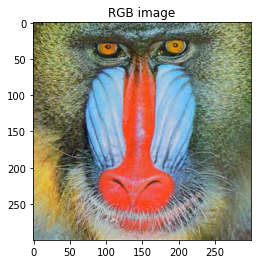

In [30]:
def load_image(path):
    # Load our image with the Python Image Library
    # Values by default are 0-255, we divide to normalize to the 0.0-1.0 range
    import PIL.Image

    return np.array(PIL.Image.open(path)) / 255.0


def visualize_rgb(title, image):
    assert type(title) == str, "Title not a string!"
    assert len(image.shape) == 3, "Image array not 3D!"
    assert image.shape[2], "Last dimension must have length 3! (RGB)"

    # Visualize image
    plt.imshow(image)

    # Give our plot a title -- this is purely cosmetic!
    plt.title(title)

    # Show image
    plt.show()


rgb_image = load_image("cv1_assets/baboon.jpg")
visualize_rgb("RGB image", rgb_image)

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: RGB Visualization</div>

Neat &mdash; we have color!

Fill out the code cell below to independently visualize each of the three channels, and see if you can answer these questions:

1) What shape is the `rgb_image` array? What does each dimension<sup>1</sup> correspond to?

2) In which channel are the eyes of the baboon the dimmest? Why?

3) In which channel is the nose of the baboon the brightest? Why?

> Your response here!


<span style="color: #aaa"><sup>1</sup> If an array has shape (7, 5), it has 2 dimensions, shape (7, 5, 8) has 3 dimensions, etc</span>

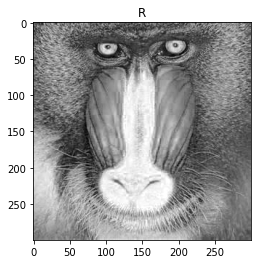

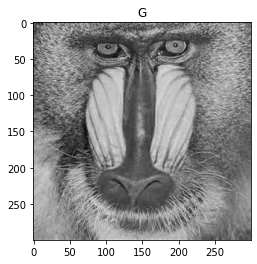

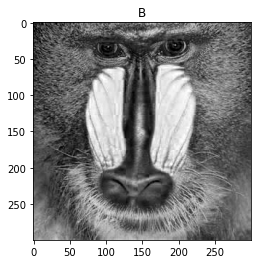

In [31]:
r_channel = None
g_channel = None
b_channel = None

# Index into `rgb_image` to get the R, G, and B channels
# > This should be 3 lines
# > If you're stuck, Code Study #3 might be useful!
# ~~START DELETE~~
r_channel = rgb_image[:, :, 0]
g_channel = rgb_image[:, :, 1]
b_channel = rgb_image[:, :, 2]
# ~~END DELETE~~

assert rgb_image.shape == (300, 300, 3)
assert r_channel.shape == (300, 300)
assert g_channel.shape == (300, 300)
assert b_channel.shape == (300, 300)

# Visualize each channel using `visualize_single_channel()`
# > This should be 3 lines, and generate 3 plots
# ~~START DELETE~~
visualize_single_channel("R", r_channel)
visualize_single_channel("G", g_channel)
visualize_single_channel("B", b_channel)
# ~~END DELETE~~

### c) HSL

While RGB is the most common way colors are represented, it's by no means our only option.

One alternative is HSL, which standards for **h**ue, **s**aturation, and **l**ightness. Many consider HSL to be more intuitive than RGB, which has led to widespread use in the computer graphics and digital art communities.

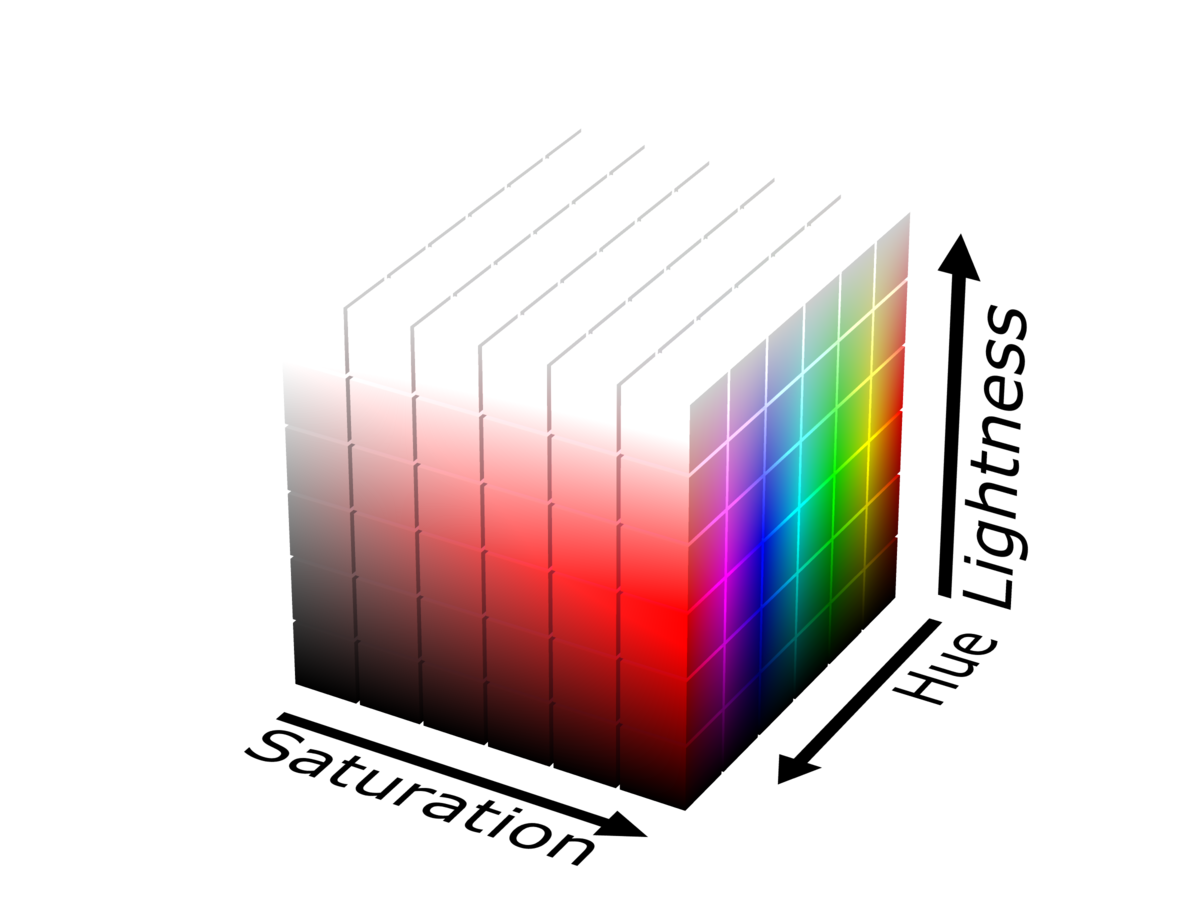

For convenience, we've provided a helper function for converting our RGB image to its HSL representation:

In [32]:
def rgb2hsl(rgb_image):
    assert len(rgb_image.shape) == 3, "Image array not 3D!"
    assert rgb_image.shape[2], "Last dimension must have length 3! (RGB)"

    # Use OpenCV to convert RGB image to HLS
    import cv2

    output = cv2.cvtColor(rgb_image.astype(np.float32), cv2.COLOR_RGB2HLS)

    # Flip channels: HLS -> HSL
    output[:, :, 1], output[:, :, 2] = (
        output[:, :, 2].copy(),
        output[:, :, 1].copy(),
    )

    # Normalize H range: 0-360 -> 0-1
    output[:, :, 0] /= 360.0

    # Return HSL image
    return output

<div style="color: #a00; font-weight: 800; padding: 1em 0; border-top: 0.4em solid #eee;">Checkoff: HSL Visualization</div>

Use the code cell below to visualize the H, S, and L channels corresponding to the baboon image from earlier. The code for this should be almost the same as your RGB visualization!

1) Which of the channels most resembles the original image? Why?

2) How might you convert an image to grayscale?

3) The nose of the baboon is extremely dark in the H channel, but bright in the S channel &mdash; why do you think this is?

> Your response here!


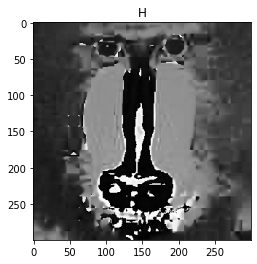

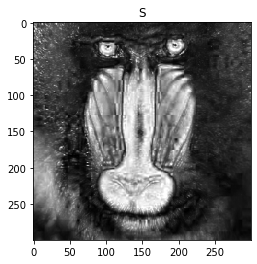

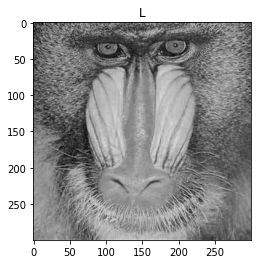

In [33]:
# Convert RGB image to HSL
hsl_image = rgb2hsl(rgb_image)
assert hsl_image.shape == (300, 300, 3)

h_channel = None
s_channel = None
l_channel = None

# Index into `rgb_image` to get the H, S, and L channels
# > This should be 3 lines
# > If you're stuck, Code Study #3 might be useful!
# ~~START DELETE~~
h_channel = hsl_image[:, :, 0]
s_channel = hsl_image[:, :, 1]
l_channel = hsl_image[:, :, 2]
# ~~END DELETE~~

assert h_channel.shape == (300, 300)
assert s_channel.shape == (300, 300)
assert l_channel.shape == (300, 300)

# Visualize each channel using `visualize_single_channel()`
# > This should be 3 lines, and generate 3 plots
# ~~START DELETE~~
visualize_single_channel("H", h_channel)
visualize_single_channel("S", s_channel)
visualize_single_channel("L", l_channel)
# ~~END DELETE~~

## 3. Image Processing